<a href="https://colab.research.google.com/github/Leanse1/Pneumonia-disease-predictor/blob/main/Pneumonia_disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

100% 2.29G/2.29G [01:05<00:00, 43.2MB/s]
100% 2.29G/2.29G [01:05<00:00, 37.5MB/s]


In [7]:
import subprocess

command = "chmod 600 /root/.kaggle/kaggle.json"
subprocess.run(command, shell=True)

CompletedProcess(args='chmod 600 /root/.kaggle/kaggle.json', returncode=0)

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

In [10]:
import tensorflow as tf
train_dataset = '/content/chest_xray/chest_xray/train'
test_dataset = '/content/chest_xray/chest_xray/test'
validation_dataset = '/content/chest_xray/chest_xray/val'

# Create a dataset from the directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    # color_mode='grayscale',
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    # color_mode='grayscale',
    batch_size=BATCH_SIZE
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dataset,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    # color_mode='grayscale',
    batch_size=BATCH_SIZE
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [11]:
for image, label in train_ds.take(1):
    print(image.shape)
    print(label.numpy())

(32, 256, 256, 3)
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]


In [12]:
class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

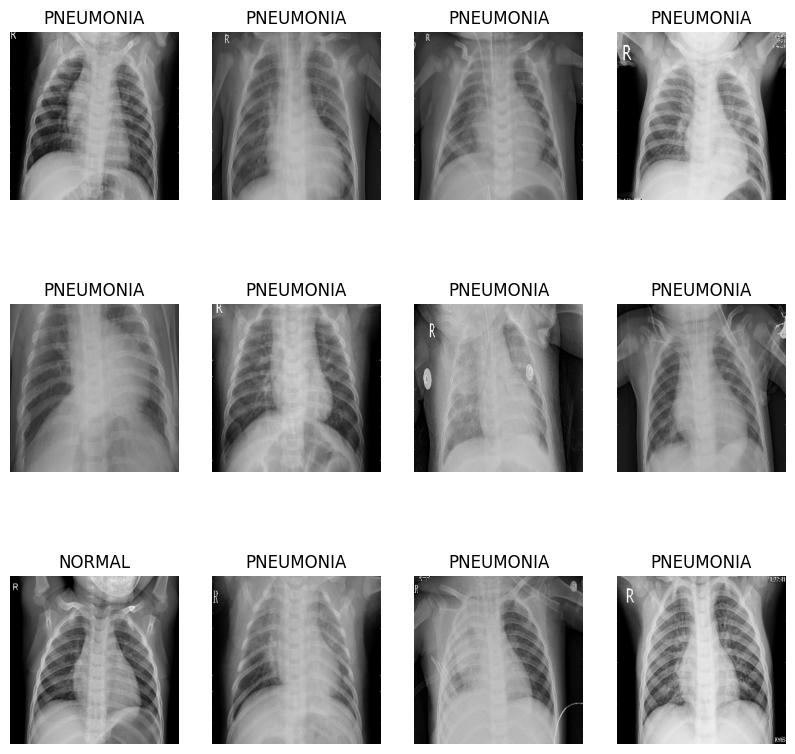

In [13]:
import matplotlib.pyplot as plt

# Assuming you have a list of class names defined as class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
from tensorflow.keras import models,layers

In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

## Building a model

In [19]:
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2  # Change to 2 for binary classification

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.build(input_shape=input_shape)


In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
163/163 [==============================] - 59s 61ms/step - loss: 0.4596 - accuracy: 0.8783 - val_loss: 0.5800 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 9s 58ms/step - loss: 0.1433 - accuracy: 0.9461 - val_loss: 0.7962 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 9s 57ms/step - loss: 0.1137 - accuracy: 0.9590 - val_loss: 0.6410 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 9s 58ms/step - loss: 0.1102 - accuracy: 0.9624 - val_loss: 2.3787 - val_accuracy: 0.5625
Epoch 5/10
163/163 [==============================] - 9s 58ms/step - loss: 0.0994 - accuracy: 0.9632 - val_loss: 0.2539 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 9s 57ms/step - loss: 0.0742 - accuracy: 0.9732 - val_loss: 0.2065 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 9s 58ms/step - loss: 0.0873 - accuracy: 0.9670 - val_loss: 0.3174 - val_accuracy: 0.875

In [23]:
scores = model.evaluate(test_ds)

20/20 [==============================] - 5s 26ms/step - loss: 0.9183 - accuracy: 0.7788


In [24]:
scores

[0.918330729007721, 0.7788461446762085]

# VGGNet

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2  # Change to 2 for binary classification

# Load pre-trained VGG16 model with weights trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
VGGNet_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),  # Change to 1 neuron for binary classification
])

VGGNet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 2s 0us/step


In [26]:
history = VGGNet_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
163/163 [==============================] - 33s 173ms/step - loss: 0.9998 - accuracy: 0.9565 - val_loss: 1.8130 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 26s 158ms/step - loss: 0.2332 - accuracy: 0.9870 - val_loss: 0.1621 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 26s 160ms/step - loss: 0.0801 - accuracy: 0.9921 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 26s 156ms/step - loss: 0.0228 - accuracy: 0.9967 - val_loss: 2.1719 - val_accuracy: 0.9375
Epoch 5/10
163/163 [==============================] - 26s 161ms/step - loss: 0.0969 - accuracy: 0.9921 - val_loss: 1.1489 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 26s 159ms/step - loss: 0.0612 - accuracy: 0.9941 - val_loss: 2.3469 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 26s 156ms/step - loss: 0.0273 - accuracy: 0.9971 - val_loss: 1.3476 - val_ac

In [33]:
scores = VGGNet_model.evaluate(test_ds)

20/20 [==============================] - 3s 149ms/step - loss: 10.6820 - accuracy: 0.8013


In [34]:
scores

[10.681962966918945, 0.8012820482254028]

# ResNet50

In [27]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2  # Change to 2 for binary classification

# Load pre-trained ResNet50 model with weights trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
ResNet50_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling2D for ResNet
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),  # Change to 1 neuron for binary classification
])

ResNet50_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 3s 0us/step


In [28]:
history = ResNet50_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
163/163 [==============================] - 27s 130ms/step - loss: 0.1338 - accuracy: 0.9427 - val_loss: 1.1057 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 20s 120ms/step - loss: 0.0706 - accuracy: 0.9720 - val_loss: 0.2748 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 19s 119ms/step - loss: 0.0568 - accuracy: 0.9803 - val_loss: 0.4570 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 19s 118ms/step - loss: 0.0454 - accuracy: 0.9841 - val_loss: 0.4252 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 19s 120ms/step - loss: 0.0356 - accuracy: 0.9873 - val_loss: 0.7426 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 19s 119ms/step - loss: 0.0362 - accuracy: 0.9843 - val_loss: 0.5656 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 19s 120ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.2931 - val_ac

In [35]:
scores = ResNet50_model.evaluate(test_ds)

20/20 [==============================] - 2s 114ms/step - loss: 1.4134 - accuracy: 0.7436


In [36]:
scores

[1.4133570194244385, 0.7435897588729858]

# InceptionV3

In [29]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2  # Change to 2 for binary classification

# Load pre-trained InceptionV3 model with weights trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
InceptionV3_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),  # Change to 1 neuron for binary classification
])

InceptionV3_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 3s 0us/step


In [30]:
history = InceptionV3_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
163/163 [==============================] - 24s 105ms/step - loss: 1.0610 - accuracy: 0.8886 - val_loss: 3.1988 - val_accuracy: 0.5625
Epoch 2/10
163/163 [==============================] - 15s 91ms/step - loss: 0.2488 - accuracy: 0.9195 - val_loss: 1.9230 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 15s 91ms/step - loss: 0.3312 - accuracy: 0.9191 - val_loss: 1.6356 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 15s 90ms/step - loss: 0.1979 - accuracy: 0.9425 - val_loss: 3.1479 - val_accuracy: 0.5625
Epoch 5/10
163/163 [==============================] - 15s 90ms/step - loss: 0.2547 - accuracy: 0.9333 - val_loss: 2.0444 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 15s 90ms/step - loss: 0.2301 - accuracy: 0.9363 - val_loss: 1.5064 - val_accuracy: 0.6875
Epoch 7/10
163/163 [==============================] - 15s 91ms/step - loss: 0.1911 - accuracy: 0.9423 - val_loss: 1.9799 - val_accuracy

In [38]:
scores =InceptionV3_model.evaluate(test_ds)

20/20 [==============================] - 2s 87ms/step - loss: 1.4746 - accuracy: 0.6971


In [39]:
scores

[1.4745546579360962, 0.6971153616905212]

# MobilenetV2

In [31]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2  # Change to 2 for binary classification

# Load pre-trained MobileNetV2 model with weights trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the convolutional layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
MobilenetV2_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),  # Change to 1 neuron for binary classification
])

MobilenetV2_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


9406464/9406464 [==============================] - 1s 0us/step


In [32]:
history = MobilenetV2_model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
163/163 [==============================] - 14s 65ms/step - loss: 0.2282 - accuracy: 0.9022 - val_loss: 1.3841 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 10s 58ms/step - loss: 0.1565 - accuracy: 0.9371 - val_loss: 0.8567 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 9s 57ms/step - loss: 0.1364 - accuracy: 0.9484 - val_loss: 0.6330 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 9s 58ms/step - loss: 0.1199 - accuracy: 0.9542 - val_loss: 0.6151 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 10s 60ms/step - loss: 0.1130 - accuracy: 0.9555 - val_loss: 0.6516 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 9s 56ms/step - loss: 0.1065 - accuracy: 0.9594 - val_loss: 0.3513 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 9s 58ms/step - loss: 0.0891 - accuracy: 0.9657 - val_loss: 0.3674 - val_accuracy: 0.8

In [40]:
scores = MobilenetV2_model.evaluate(test_ds)

20/20 [==============================] - 1s 56ms/step - loss: 0.8976 - accuracy: 0.7708


In [41]:
scores

[0.8976444602012634, 0.7708333134651184]

#SUMMARY



1.   Model is overfitting
2.   Epochs need to be raised
3.   Better regularisation can be done
4.   Should have build a less complex dataset
5.   Should have had dropout rate
6.   Should try Hyperparameter Tuning
7.   Should have had Data Augmentation



# As it is computationally expensive to re-run the project, we will run the project with the above said alternatives to increase accuracy in the near future